In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

In [2]:
from Utils.ProjectPathsSetup import ProjectPathsSetup
ProjectPathsSetup().add_project_paths()

## PreTratamento nos dados

Merge e shuffle de todos os bancos de dados

In [3]:
# Simulation Parameters
DATASET_PATH='../Dataset/'
TRUE_NEWS_DATASET = DATASET_PATH + 'True.csv'
FAKE_NEWS_DATASET= DATASET_PATH + 'Fake.csv'
WEL_FAKE_DATASET=DATASET_PATH +'WELFake_Dataset.csv'

In [4]:
#load Data

fake_news_df = pd.read_csv(TRUE_NEWS_DATASET)
true_news_df = pd.read_csv(FAKE_NEWS_DATASET)

### Pré Avaliação Datasets

In [5]:
fake_news_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


Text(0.5, 1.0, 'Fake news distribution per Subject')

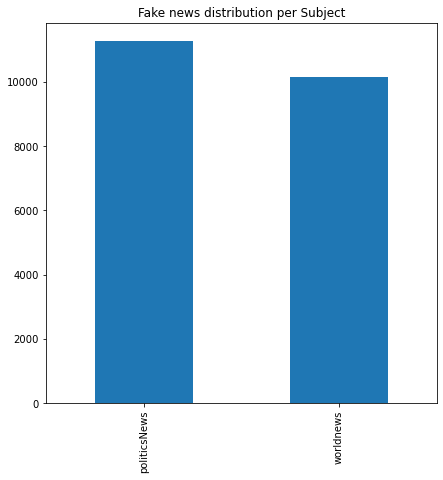

In [6]:
fig = plt.figure(figsize=(7,7))
fake_news_df['subject'].value_counts().plot(kind='bar')
plt.title('Fake news distribution per Subject')

#### True news

In [7]:
true_news_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


Text(0.5, 1.0, 'True news distribution per Subject')

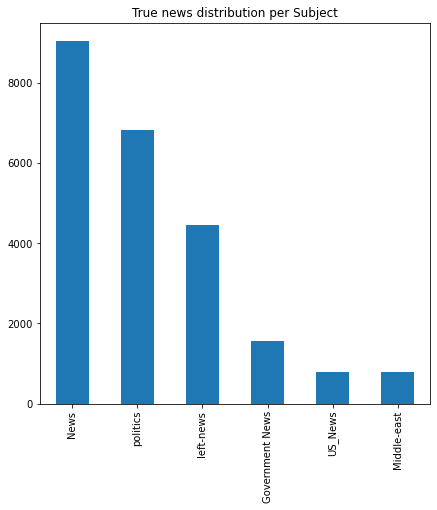

In [8]:
fig = plt.figure(figsize=(7,7))
true_news_df['subject'].value_counts().plot(kind='bar')
plt.title('True news distribution per Subject')

Comparando a distribuição de assunto entre as fakenews com as True news percebe-se que as fakenews são focadas em dois principais assutos equanto as notícias verdadeira são mais diversas. Será então que se queremos construir um bom detector de fake news não deveriamos então focar nesses dois assuntos? Ou então o assunto não seria relevante?

#### WelNews

Vamos considerar só relevante o titulo e o texto relativo as noticias

In [9]:
## merge
true_news_df['label'] = 0
true_news_df_rev= true_news_df[['title','text','label']].copy()

fake_news_df['label'] = 1
fake_news_df_rev= fake_news_df[['title','text','label']].copy()


news_df = pd.concat([true_news_df_rev, fake_news_df_rev], axis=0)



In [10]:
#shuffle dataset
news_df = news_df.sample(frac=1).reset_index(drop=True)

In [11]:
news_df

,title,text,label
0,Tunisia premier names new economic reforms min...,TUNIS (Reuters) - Tunisian Prime Minister Yous...,1
1,"Trump seeks border wall, crackdown on unaccomp...",WASHINGTON (Reuters) - U.S. President Donald T...,1
2,Muslims flee Indian village after singer kille...,NEW DELHI (Reuters) - At least 200 Muslims hav...,1
3,Protesters clash with police at Turin's G7 lab...,MILAN (Reuters) - Anti-globalisation protester...,1
4,House narrowly passes measure paving way for T...,WASHINGTON (Reuters) - The U.S. House of Repre...,1
...,...,...,...
44893,"Honduran president ignores new election calls,...",TEGUCIGALPA (Reuters) - The president of Hondu...,1
44894,"House Republicans propose to scrap $7,500 elec...",WASHINGTON (Reuters) - House Republicans are p...,1
44895,Ivanka Trump Legally BARRED From Participatin...,The Office of Government Ethics has said that ...,0
44896,Trump lawyer denies Deutsche Bank got subpoena...,FRANKFURT/WASHINGTON (Reuters) - A U.S. feder...,1


In [12]:

#shuffle dataset
news_df = news_df.sample(frac=1).reset_index(drop=True).iloc[:10001]

In [13]:
#save dataset
news_df.to_csv(DATASET_PATH + 'news_dataset.csv')

## Data Preprocessing

In [14]:
def remove_especial_chars(text):

  return re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

### Removendo caracteres Especiais

In [15]:
#removing especial charactercts

news_df_preprocessed = news_df.copy()
news_df_preprocessed['title'] = news_df_preprocessed['title'].apply(remove_especial_chars)
news_df_preprocessed['text'] = news_df_preprocessed['text'].apply(remove_especial_chars)

#conver every character to lower case to not confusing model

news_df_preprocessed['title'] = news_df_preprocessed['title'].apply(lambda text: text.lower())
news_df_preprocessed['text'] = news_df_preprocessed['text'].apply(lambda text: text.lower())


In [16]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
#tokenizing
news_df_preprocessed['title_tokens'] = news_df_preprocessed['title'].apply(nltk.word_tokenize)
news_df_preprocessed['text_tokens'] = news_df_preprocessed['text'].apply(nltk.word_tokenize)

In [18]:
news_df_preprocessed

,title,text,label,title_tokens,text_tokens
0,trump to speak in tough terms about north ko...,new york reuters president donald trump wi...,1,"[trump, to, speak, in, tough, terms, about, no...","[new, york, reuters, president, donald, trump,..."
1,trumpdom the curious world of trump s foreign...,niraj srivastava 21st century wireit is barely...,0,"[trumpdom, the, curious, world, of, trump, s, ...","[niraj, srivastava, 21st, century, wireit, is,..."
2,syrian government welcomes committee to discus...,beirut reuters the syrian government welco...,1,"[syrian, government, welcomes, committee, to, ...","[beirut, reuters, the, syrian, government, wel..."
3,pence reassures japan of u s resolve on north...,tokyo reuters u s vice president mike pen...,1,"[pence, reassures, japan, of, u, s, resolve, o...","[tokyo, reuters, u, s, vice, president, mike, ..."
4,watch president trump calls out feds on overr...,president trump on overregulation they spent...,0,"[watch, president, trump, calls, out, feds, on...","[president, trump, on, overregulation, they, s..."
...,...,...,...,...,...
9996,texas governor draws criticism for joke about ...,austin texas reuters texas governor greg ...,1,"[texas, governor, draws, criticism, for, joke,...","[austin, texas, reuters, texas, governor, greg..."
9997,headless torso could belong to submarine journ...,copenhagen reuters danish police said on t...,1,"[headless, torso, could, belong, to, submarine...","[copenhagen, reuters, danish, police, said, on..."
9998,the plot thickens demoted doj official s wife...,this is a big deal even though we re sure the ...,0,"[the, plot, thickens, demoted, doj, official, ...","[this, is, a, big, deal, even, though, we, re,..."
9999,u s house passes sanctions on iran backed hez...,washington reuters the u s house of repre...,1,"[u, s, house, passes, sanctions, on, iran, bac...","[washington, reuters, the, u, s, house, of, re..."


In [19]:
#stopping work elimination

from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

def eliminate_stopwords(tokens):
  return [word for word in tokens if word not in stop_words]


#eliminate stop words
news_df_preprocessed['title_tokens'] = news_df_preprocessed['title_tokens'].apply(eliminate_stopwords)
news_df_preprocessed['text_tokens'] = news_df_preprocessed['title_tokens'].apply(eliminate_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
news_df_preprocessed

,title,text,label,title_tokens,text_tokens
0,trump to speak in tough terms about north ko...,new york reuters president donald trump wi...,1,"[trump, speak, tough, terms, north, korea, fir...","[trump, speak, tough, terms, north, korea, fir..."
1,trumpdom the curious world of trump s foreign...,niraj srivastava 21st century wireit is barely...,0,"[trumpdom, curious, world, trump, foreign, pol...","[trumpdom, curious, world, trump, foreign, pol..."
2,syrian government welcomes committee to discus...,beirut reuters the syrian government welco...,1,"[syrian, government, welcomes, committee, disc...","[syrian, government, welcomes, committee, disc..."
3,pence reassures japan of u s resolve on north...,tokyo reuters u s vice president mike pen...,1,"[pence, reassures, japan, u, resolve, north, k...","[pence, reassures, japan, u, resolve, north, k..."
4,watch president trump calls out feds on overr...,president trump on overregulation they spent...,0,"[watch, president, trump, calls, feds, overreg...","[watch, president, trump, calls, feds, overreg..."
...,...,...,...,...,...
9996,texas governor draws criticism for joke about ...,austin texas reuters texas governor greg ...,1,"[texas, governor, draws, criticism, joke, shoo...","[texas, governor, draws, criticism, joke, shoo..."
9997,headless torso could belong to submarine journ...,copenhagen reuters danish police said on t...,1,"[headless, torso, could, belong, submarine, jo...","[headless, torso, could, belong, submarine, jo..."
9998,the plot thickens demoted doj official s wife...,this is a big deal even though we re sure the ...,0,"[plot, thickens, demoted, doj, official, wife,...","[plot, thickens, demoted, doj, official, wife,..."
9999,u s house passes sanctions on iran backed hez...,washington reuters the u s house of repre...,1,"[u, house, passes, sanctions, iran, backed, he...","[u, house, passes, sanctions, iran, backed, he..."


In [21]:
nltk.download('rslp')
def steam_text(tokens):
  stemmer = nltk.stem.RSLPStemmer()
  return  [stemmer.stem(word) for word in tokens]

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [22]:
#stemming tokens
news_df_preprocessed['title_tokens'] = news_df_preprocessed['title_tokens'].apply(steam_text)
news_df_preprocessed['text_tokens'] = news_df_preprocessed['title_tokens'].apply(steam_text)

In [23]:
news_df_preprocessed

,title,text,label,title_tokens,text_tokens
0,trump to speak in tough terms about north ko...,new york reuters president donald trump wi...,1,"[trump, speak, tough, term, north, kore, first...","[trump, speak, tough, term, north, kor, first,..."
1,trumpdom the curious world of trump s foreign...,niraj srivastava 21st century wireit is barely...,0,"[trumpdom, curi, world, trump, foreign, policy...","[trumpdom, cur, world, trump, foreign, policy,..."
2,syrian government welcomes committee to discus...,beirut reuters the syrian government welco...,1,"[syrian, government, welcom, committe, discus,...","[syrian, government, welcom, committ, discu, c..."
3,pence reassures japan of u s resolve on north...,tokyo reuters u s vice president mike pen...,1,"[penc, reassur, japan, u, resolv, north, kore,...","[penc, reassur, japan, u, resolv, north, kor, ..."
4,watch president trump calls out feds on overr...,president trump on overregulation they spent...,0,"[watch, president, trump, call, fed, overregul...","[watch, president, trump, call, fed, overregul..."
...,...,...,...,...,...
9996,texas governor draws criticism for joke about ...,austin texas reuters texas governor greg ...,1,"[tex, govern, draw, criticism, jok, shooting, ...","[tex, govern, draw, criticism, jok, shooting, ..."
9997,headless torso could belong to submarine journ...,copenhagen reuters danish police said on t...,1,"[headles, tors, could, belong, submarin, journ...","[headl, tor, could, belong, submarin, journali..."
9998,the plot thickens demoted doj official s wife...,this is a big deal even though we re sure the ...,0,"[plot, thick, demoted, doj, offic, wif, worked...","[plot, thick, demoted, doj, offic, wif, worked..."
9999,u s house passes sanctions on iran backed hez...,washington reuters the u s house of repre...,1,"[u, hous, pass, sanctiom, iran, backed, hezbol...","[u, hou, pas, sanctiom, iran, backed, hezbollah]"


In [24]:
from gensim.models import Word2Vec
import multiprocessing

cores = multiprocessing.cpu_count()

In [25]:
# Train Word2Vec model for text column
text_corpus  = news_df_preprocessed['text_tokens'].tolist()
model_for_text =  Word2Vec(sentences=text_corpus, window=5, min_count=1, workers=4)

In [26]:
text_vocab_size = len(model_for_text.wv.index_to_key)
print(f'Tamanho vocabulario Texto: {text_vocab_size}')


Tamanho vocabulario Texto: 10034


In [27]:
# Train Word2Vec model for title column
title_corpus = news_df_preprocessed['title_tokens'].tolist()
model_for_title = Word2Vec(sentences=title_corpus, window=5, min_count=1, workers=4)

In [28]:
title_vocab_size = len(model_for_title.wv.index_to_key)
print(f'Tamanho vocabulario Título: {title_vocab_size}')

Tamanho vocabulario Título: 10230


In [29]:
def get_vectors_from_text(tokens):

  return [model_for_text.wv[word] for word in tokens]



def get_vectors_from_title(tokens):

  return [model_for_title.wv[word] for word in tokens]




In [30]:
# Word2Vector
news_df_preprocessed['text_vectors'] = news_df_preprocessed['text_tokens'].apply(get_vectors_from_text)
news_df_preprocessed['title_vectors']  = news_df_preprocessed['title_tokens'].apply(get_vectors_from_title)


In [31]:
news_df_preprocessed

,title,text,label,title_tokens,text_tokens,text_vectors,title_vectors
0,trump to speak in tough terms about north ko...,new york reuters president donald trump wi...,1,"[trump, speak, tough, term, north, kore, first...","[trump, speak, tough, term, north, kor, first,...","[[-0.7589078, 0.9845284, 0.4076378, 0.20985341...","[[-0.4858475, 0.6170067, 0.42619228, 0.0824127..."
1,trumpdom the curious world of trump s foreign...,niraj srivastava 21st century wireit is barely...,0,"[trumpdom, curi, world, trump, foreign, policy...","[trumpdom, cur, world, trump, foreign, policy,...","[[0.0041288766, 0.0076432647, 0.0050521195, -2...","[[-0.009544131, -0.0023017293, 0.007438378, 0...."
2,syrian government welcomes committee to discus...,beirut reuters the syrian government welco...,1,"[syrian, government, welcom, committe, discus,...","[syrian, government, welcom, committ, discu, c...","[[-0.3304831, 0.44956946, 0.17435345, 0.075494...","[[-0.20696063, 0.26158795, 0.16853805, 0.03172..."
3,pence reassures japan of u s resolve on north...,tokyo reuters u s vice president mike pen...,1,"[penc, reassur, japan, u, resolv, north, kore,...","[penc, reassur, japan, u, resolv, north, kor, ...","[[-0.2556922, 0.33250555, 0.13485076, 0.068203...","[[-0.14901431, 0.18683134, 0.12966375, 0.01570..."
4,watch president trump calls out feds on overr...,president trump on overregulation they spent...,0,"[watch, president, trump, call, fed, overregul...","[watch, president, trump, call, fed, overregul...","[[-0.65367615, 0.8648933, 0.35782167, 0.152086...","[[-0.42122144, 0.555129, 0.3707819, 0.04425160..."
...,...,...,...,...,...,...,...
9996,texas governor draws criticism for joke about ...,austin texas reuters texas governor greg ...,1,"[tex, govern, draw, criticism, jok, shooting, ...","[tex, govern, draw, criticism, jok, shooting, ...","[[-0.3064386, 0.41395864, 0.17117338, 0.081063...","[[-0.18158622, 0.2532401, 0.16414362, 0.013275..."
9997,headless torso could belong to submarine journ...,copenhagen reuters danish police said on t...,1,"[headles, tors, could, belong, submarin, journ...","[headl, tor, could, belong, submarin, journali...","[[-0.002639917, -0.000250387, 0.002804916, 0.0...","[[-0.009556456, 0.00017725077, 0.010364653, -0..."
9998,the plot thickens demoted doj official s wife...,this is a big deal even though we re sure the ...,0,"[plot, thick, demoted, doj, offic, wif, worked...","[plot, thick, demoted, doj, offic, wif, worked...","[[-0.10359029, 0.13849506, 0.056432277, 0.0218...","[[-0.05692727, 0.073672764, 0.042973306, 0.005..."
9999,u s house passes sanctions on iran backed hez...,washington reuters the u s house of repre...,1,"[u, hous, pass, sanctiom, iran, backed, hezbol...","[u, hou, pas, sanctiom, iran, backed, hezbollah]","[[-0.7361949, 0.96214074, 0.36746264, 0.124758...","[[-0.49119195, 0.5905452, 0.3820063, 0.0206071..."


In [32]:
news_df_preprocessed['text_tokens'].apply(lambda x: len(x))


0        10
1         7
2         6
3         9
4        14
         ..
9996      7
9997      8
9998     14
9999      7
10000    11
Name: text_tokens, Length: 10001, dtype: int64

## Modelagem

In [33]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.utils import plot_model


### Modeling for title

In [34]:
#  the model for the title
VO_SIZE=500
EMBEDDING_VECTOR_FEATURE_TITLE=50
text_sentences = len(news_df_preprocessed['text_tokens'])
model_title = Sequential()
model_title.add(Embedding(VO_SIZE, EMBEDDING_VECTOR_FEATURE_TITLE, name='title_embedding'))
model_title.add(LSTM(100))
model_title.add( Dense(1, activation='sigmoid'))
model_title.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_title.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_embedding (Embedding)  (None, None, 50)         25000     
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 85,501
Trainable params: 85,501
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

title_sent_length = 20
title_sentences = [' '.join(words) for words in news_df_preprocessed['title_tokens']]
onehot_rep = [one_hot(words, VO_SIZE) for words in title_sentences]
embedded_doc = pad_sequences(onehot_rep, padding='pre', maxlen=title_sent_length)


In [36]:
embedded_doc.shape


(10001, 20)

In [37]:
from sklearn.model_selection import train_test_split

SEED=101
X_title = np.array(embedded_doc)
y = np.array(news_df_preprocessed['label'])

X_title_train, X_title_test, y_title_train , y_title_test = train_test_split(X_title, y, train_size=0.8, random_state=SEED)

In [38]:


history_title = model_title.fit(X_title_train, y_title_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)




Epoch 1/40
200/200 [==============================] - 8s 22ms/step - loss: 0.4317 - accuracy: 0.7920 - val_loss: 0.2982 - val_accuracy: 0.8844
Epoch 2/40
200/200 [==============================] - 3s 17ms/step - loss: 0.2795 - accuracy: 0.8805 - val_loss: 0.2646 - val_accuracy: 0.8963
Epoch 3/40
200/200 [==============================] - 3s 16ms/step - loss: 0.2516 - accuracy: 0.8909 - val_loss: 0.2794 - val_accuracy: 0.8850
Epoch 4/40
200/200 [==============================] - 3s 15ms/step - loss: 0.2337 - accuracy: 0.8975 - val_loss: 0.2698 - val_accuracy: 0.8925
Epoch 5/40
200/200 [==============================] - 3s 15ms/step - loss: 0.2201 - accuracy: 0.9072 - val_loss: 0.2800 - val_accuracy: 0.8863
Epoch 6/40
200/200 [==============================] - 3s 15ms/step - loss: 0.2041 - accuracy: 0.9150 - val_loss: 0.3021 - val_accuracy: 0.8844
Epoch 7/40
200/200 [==============================] - 3s 15ms/step - loss: 0.1827 - accuracy: 0.9242 - val_loss: 0.3117 - val_accuracy: 0.8856

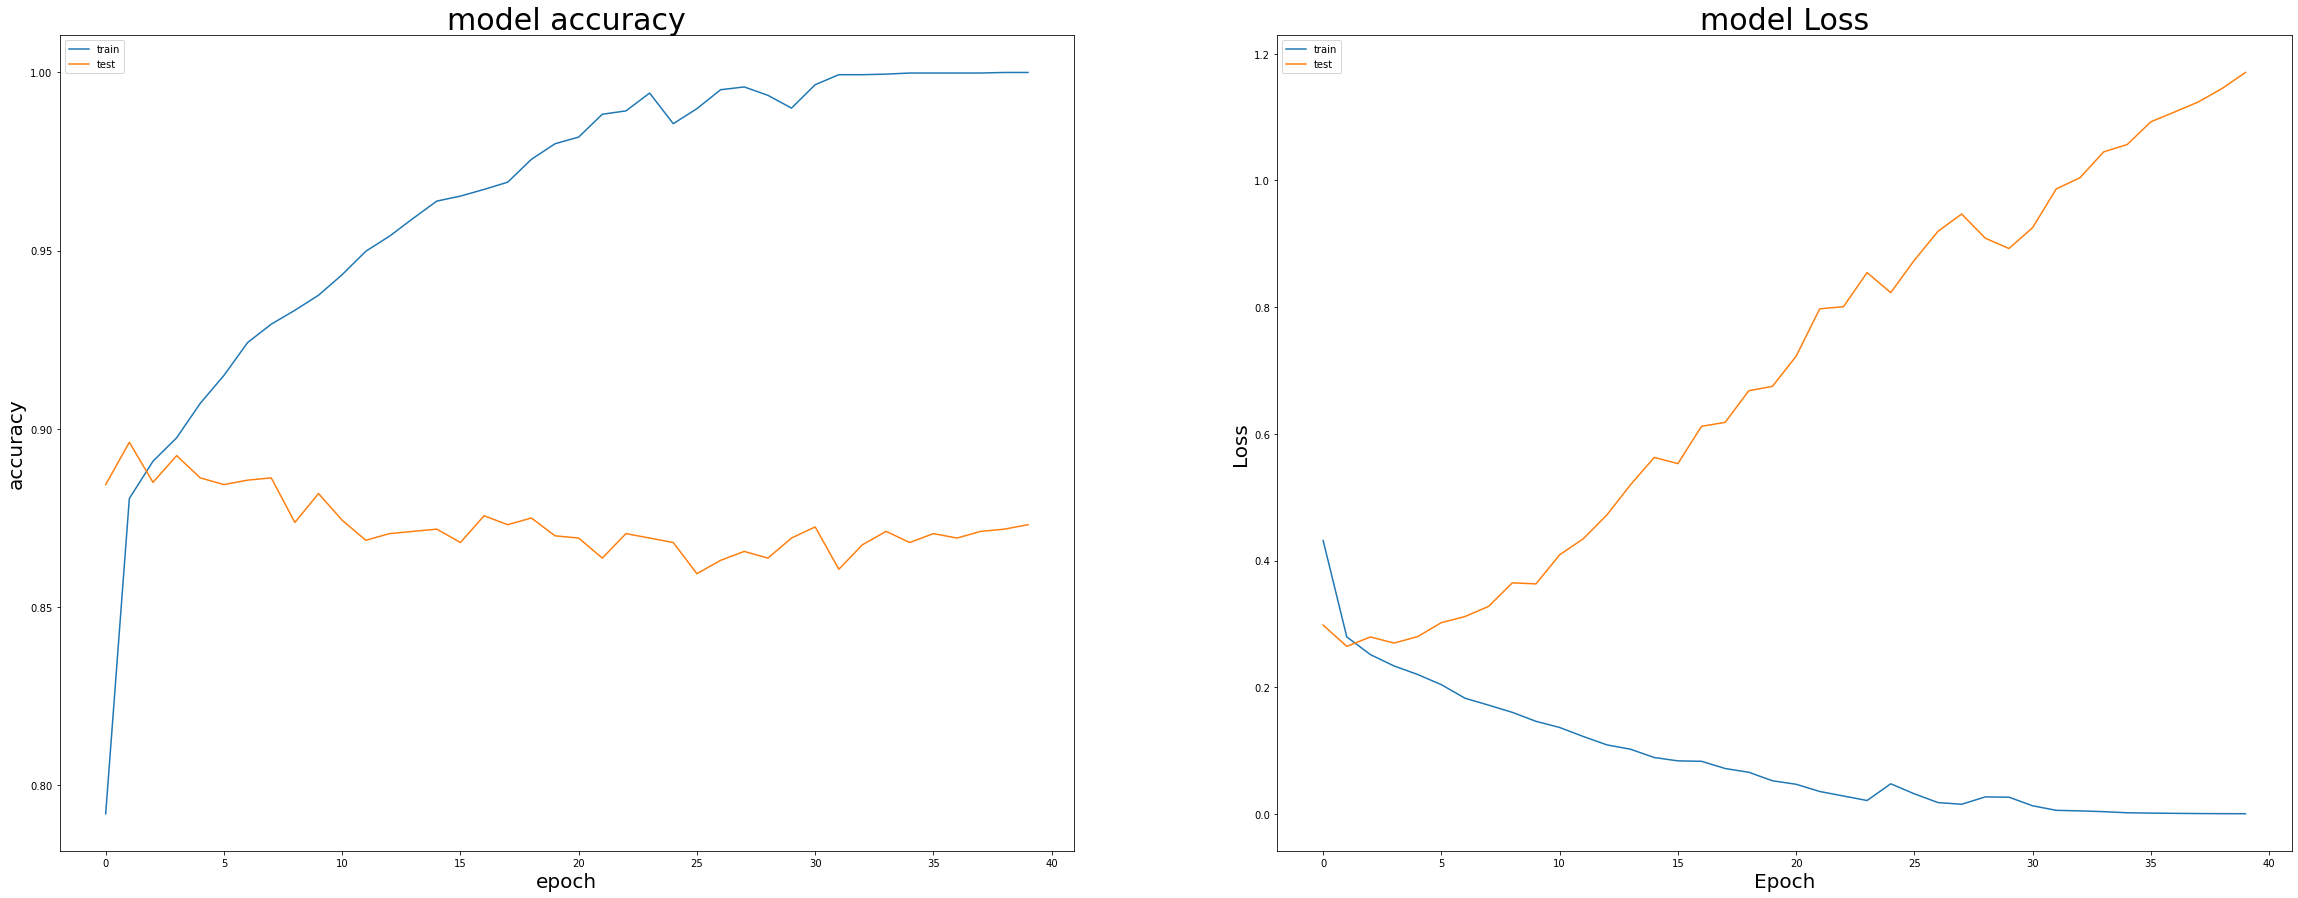

In [39]:
FONT_SIZE=20
TITLE_SIZE=30


fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(history_title.history['accuracy'])
axs[0].plot(history_title.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(history_title.history['loss'])
axs[1].plot(history_title.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)
axs[1].legend(['train', 'test'], loc='upper left')

#### more sofisticated model

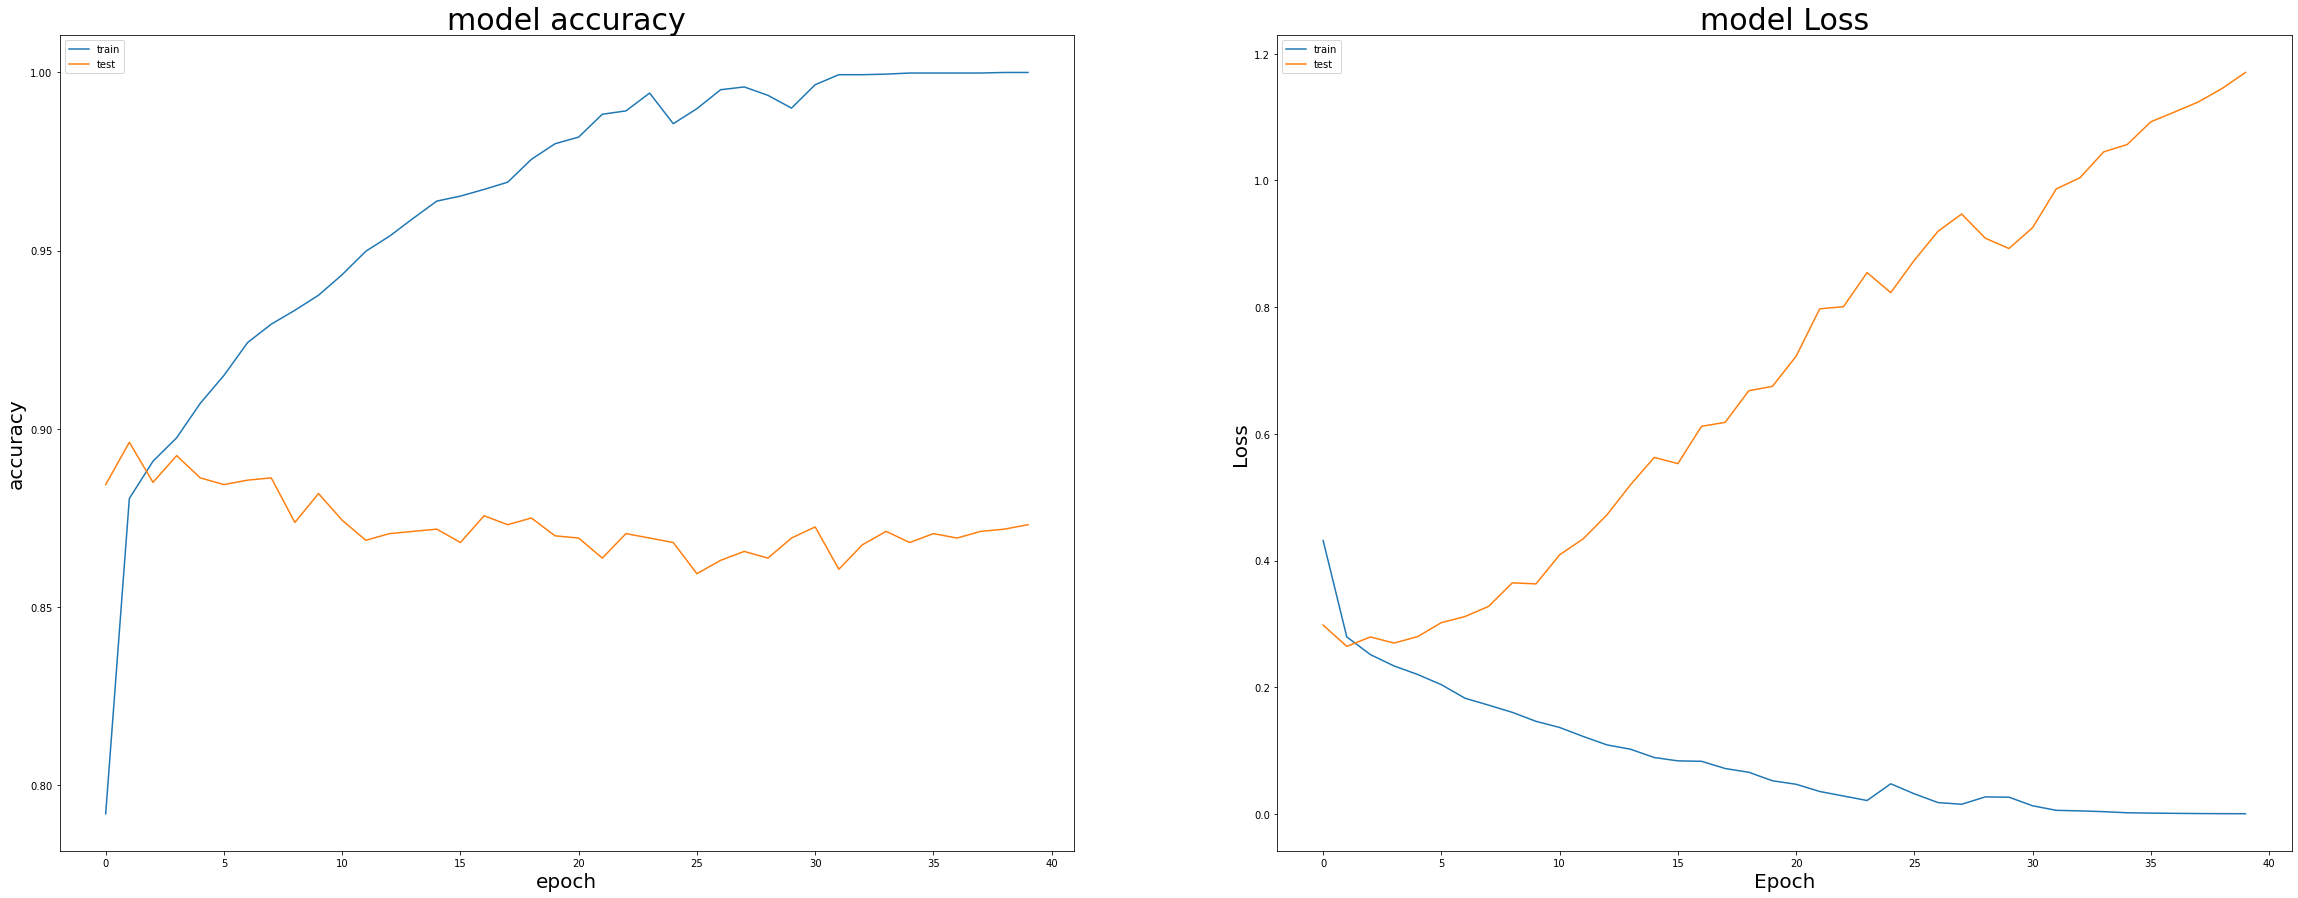

In [40]:


fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(history_title.history['accuracy'])
axs[0].plot(history_title.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(history_title.history['loss'])
axs[1].plot(history_title.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)
axs[1].legend(['train', 'test'], loc='upper left')


#### with simpler model

In [41]:
N_DIM = 100
model_ohp_simpler = Sequential()
model_ohp_simpler.add(Dense(32, activation='relu', input_dim= title_sent_length))
model_ohp_simpler.add(Dense(1, activation='sigmoid'))
model_ohp_simpler.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_w2v_simpler_history = model_ohp_simpler.fit(X_title_train, y_title_train, validation_split=0.2,  epochs=40, batch_size=32, verbose=1)

Epoch 1/40
200/200 [==============================] - 2s 5ms/step - loss: 16.5244 - accuracy: 0.6114 - val_loss: 7.0426 - val_accuracy: 0.6044
Epoch 2/40
200/200 [==============================] - 1s 4ms/step - loss: 4.7770 - accuracy: 0.6372 - val_loss: 3.4654 - val_accuracy: 0.6612
Epoch 3/40
200/200 [==============================] - 1s 3ms/step - loss: 2.9306 - accuracy: 0.6395 - val_loss: 2.4529 - val_accuracy: 0.5763
Epoch 4/40
200/200 [==============================] - 0s 2ms/step - loss: 2.3947 - accuracy: 0.6277 - val_loss: 1.7138 - val_accuracy: 0.6856
Epoch 5/40
200/200 [==============================] - 0s 2ms/step - loss: 1.9933 - accuracy: 0.6330 - val_loss: 1.4927 - val_accuracy: 0.6800
Epoch 6/40
200/200 [==============================] - 0s 2ms/step - loss: 1.7790 - accuracy: 0.6311 - val_loss: 1.2562 - val_accuracy: 0.6862
Epoch 7/40
200/200 [==============================] - 0s 2ms/step - loss: 1.6711 - accuracy: 0.6281 - val_loss: 1.5328 - val_accuracy: 0.6669
Epoch

Text(0.5, 0, 'Epoch')

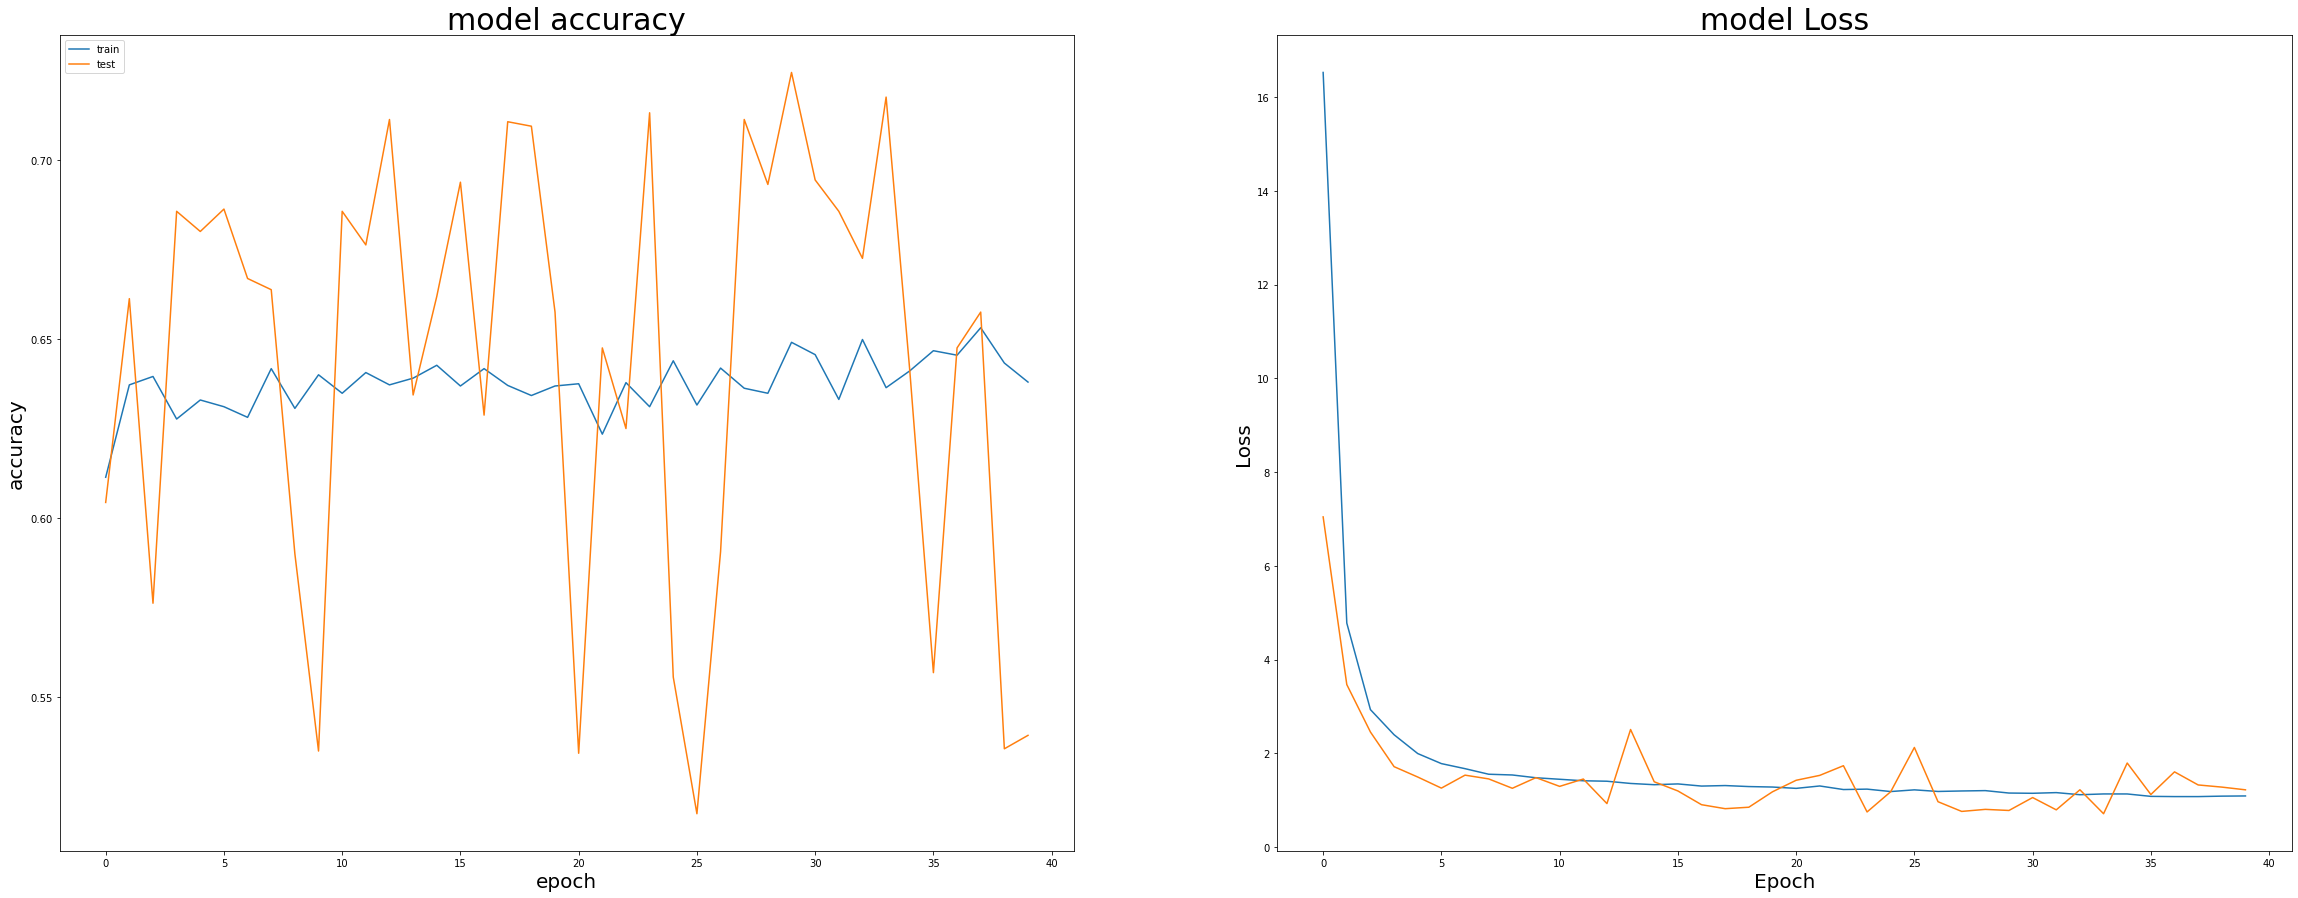

In [42]:
fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(model_w2v_simpler_history.history['accuracy'])
axs[0].plot(model_w2v_simpler_history.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(model_w2v_simpler_history.history['loss'])
axs[1].plot(model_w2v_simpler_history.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)

### Vectorizer codification

In [43]:
#  the model for the title


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import TaggedDocument

import gensim

In [45]:
#turn setences into labeled setences

def labelizeTweets(tweets, label_type):
    labelized = []
    LabeledSentence = TaggedDocument
    for i,v in tqdm(enumerate(tweets)):
        label = '%s_%s'%(label_type,i)
        labelized.append(LabeledSentence(v, [label]))
    return labelized



In [46]:
X_title_tokens = np.array(news_df_preprocessed['title_tokens'].values)
y = np.array(news_df_preprocessed['label'].values)


X_title_train, X_title_test, y_title_train , y_title_test = train_test_split(X_title_tokens, y, train_size=0.8, random_state=SEED)

In [47]:
X_train = labelizeTweets(X_title_train, 'TRAIN')
X_test = labelizeTweets(X_title_test, 'TEST')
train_words = [x.words for x in tqdm(X_train)]

8000it [00:00, 444500.21it/s]
2001it [00:00, 332230.32it/s]
100%|██████████| 8000/8000 [00:00<00:00, 1596461.70it/s]


In [48]:
#build word vocab and vectorization
N_DIM = 100
train_words = [x.words for x in tqdm(X_train)]
news_w2v = Word2Vec(vector_size=N_DIM, min_count=10,window=5, workers=4)
news_w2v.build_vocab(train_words)
news_w2v.train(train_words, total_words=news_w2v.corpus_total_words, epochs=50)

100%|██████████| 8000/8000 [00:00<00:00, 1603710.37it/s]


(2514769, 3811000)

In [49]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x.words for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

In [50]:
def buildWordVector(tokens, size, w2v):
   
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            if type(word) != str:
                for subword in word:
                    vec += w2v.wv[subword].reshape((1, size)) * tfidf[subword]
                    count += 1.
            else:        
                vec += w2v.wv[word].reshape((1, size)) * tfidf[word]
                count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec


In [51]:
from sklearn.preprocessing import scale

train_vecs_w2v = np.concatenate([buildWordVector(z, N_DIM,news_w2v) for z in tqdm(map(lambda x: x.words, X_train))])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, N_DIM,news_w2v) for z in tqdm(map(lambda x: x.words, X_test))])
test_vecs_w2v = scale(test_vecs_w2v)

857it [00:00, 8517.47it/s]

8000it [00:00, 9063.39it/s]
2001it [00:00, 11694.63it/s]


In [52]:
train_vecs_w2v

array([[-0.44221652, -0.76752786, -0.50379926, ..., -0.48687525,
         1.58993659,  0.31612062],
       [ 0.45490225, -0.57386154,  0.41436379, ...,  1.89325409,
         1.46618502,  0.26341689],
       [ 2.64272281,  1.74939025,  1.28600536, ...,  0.92014837,
         0.66520154,  0.79073307],
       ...,
       [-1.15630214, -1.30206649, -1.03646091, ..., -1.02440997,
         2.79787369, -0.69025135],
       [-0.12953423,  2.06544774,  0.36272258, ..., -0.2694566 ,
        -0.41516658,  0.75572568],
       [ 1.30177506,  0.86667114,  0.78084239, ...,  1.33672337,
        -0.72876946, -0.12183984]])

In [53]:
embedded_doc

array([[  0,   0,   0, ..., 166,  74,  29],
       [  0,   0,   0, ..., 370, 173, 390],
       [  0,   0,   0, ..., 467, 407,  65],
       ...,
       [  0,   0,   0, ..., 367, 136, 206],
       [  0,   0,   0, ..., 455, 376, 160],
       [  0,   0,   0, ..., 195, 374, 339]])

In [54]:
vocab = news_w2v.wv.key_to_index
VO_SIZE= len(list(vocab.keys()))
VO_GAP=50

In [55]:

EMBEDDING_VECTOR_FEATURE_TITLE= 50
model_title_w2v = Sequential()
model_title_w2v.add(Embedding(VO_SIZE, EMBEDDING_VECTOR_FEATURE_TITLE, name='title_embedding'))
model_title_w2v.add(LSTM(100))
model_title_w2v.add( Dense(1, activation='sigmoid'))
model_title_w2v.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_title_w2v.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_embedding (Embedding)  (None, None, 50)         76550     
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 137,051
Trainable params: 137,051
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
y_title_train

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [57]:
train_vecs_w2v2 = np.array([ np.int64(v + VO_SIZE - VO_GAP) for v in train_vecs_w2v])

history_title_w2v = model_title_w2v.fit(train_vecs_w2v2, y_title_train, validation_split=0.2 ,epochs=40, batch_size=32, verbose=1)

Epoch 1/40
200/200 [==============================] - 27s 125ms/step - loss: 0.6572 - accuracy: 0.6106 - val_loss: 0.6394 - val_accuracy: 0.6425
Epoch 2/40
200/200 [==============================] - 17s 84ms/step - loss: 0.6405 - accuracy: 0.6370 - val_loss: 0.6493 - val_accuracy: 0.6319
Epoch 3/40
200/200 [==============================] - 20s 99ms/step - loss: 0.6456 - accuracy: 0.6313 - val_loss: 0.6399 - val_accuracy: 0.6369
Epoch 4/40
200/200 [==============================] - 21s 104ms/step - loss: 0.6349 - accuracy: 0.6411 - val_loss: 0.6319 - val_accuracy: 0.6525
Epoch 5/40
200/200 [==============================] - 22s 112ms/step - loss: 0.5669 - accuracy: 0.7223 - val_loss: 0.5046 - val_accuracy: 0.7800
Epoch 6/40
200/200 [==============================] - 22s 111ms/step - loss: 0.4696 - accuracy: 0.7964 - val_loss: 0.4653 - val_accuracy: 0.7912
Epoch 7/40
200/200 [==============================] - 20s 100ms/step - loss: 0.4462 - accuracy: 0.8033 - val_loss: 0.4248 - val_accu

Text(0.5, 0, 'Epoch')

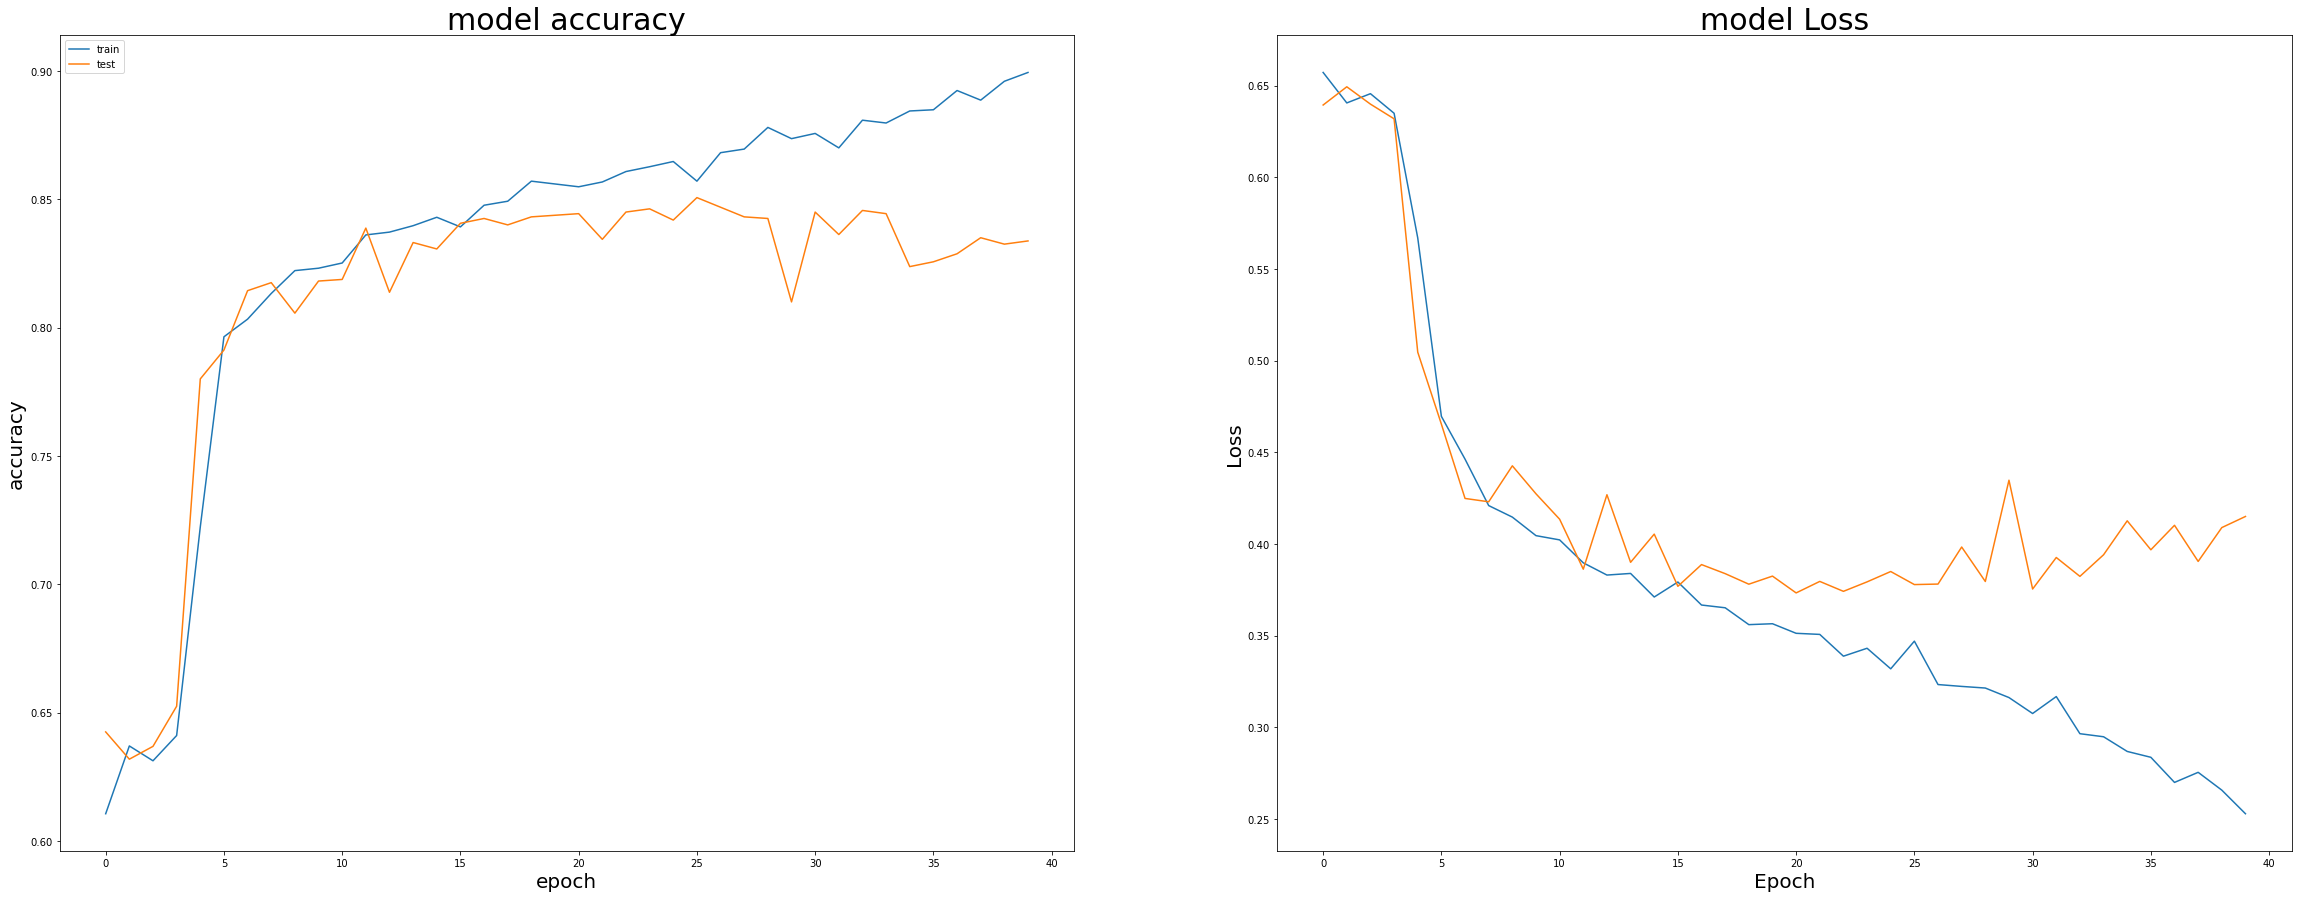

In [58]:
fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(history_title_w2v.history['accuracy'])
axs[0].plot(history_title_w2v.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(history_title_w2v.history['loss'])
axs[1].plot(history_title_w2v.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)

### Testando um modelo mais simples

In [59]:
model_w2v_simpler = Sequential()
model_w2v_simpler.add(Dense(32, activation='relu', input_dim=N_DIM))
model_w2v_simpler.add(Dense(1, activation='sigmoid'))
model_w2v_simpler.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_w2v_simpler_history = model_w2v_simpler.fit(train_vecs_w2v, y_title_train, validation_split=0.2,  epochs=40, batch_size=32, verbose=1)

Epoch 1/40
200/200 [==============================] - 1s 3ms/step - loss: 0.3557 - accuracy: 0.8389 - val_loss: 0.2666 - val_accuracy: 0.8875
Epoch 2/40
200/200 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.8955 - val_loss: 0.2563 - val_accuracy: 0.8969
Epoch 3/40
200/200 [==============================] - 0s 2ms/step - loss: 0.2456 - accuracy: 0.9017 - val_loss: 0.2501 - val_accuracy: 0.8994
Epoch 4/40
200/200 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.9073 - val_loss: 0.2504 - val_accuracy: 0.8956
Epoch 5/40
200/200 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.9123 - val_loss: 0.2496 - val_accuracy: 0.8963
Epoch 6/40
200/200 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9166 - val_loss: 0.2447 - val_accuracy: 0.9006
Epoch 7/40
200/200 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.9183 - val_loss: 0.2473 - val_accuracy: 0.8950
Epoch 

Text(0.5, 0, 'Epoch')

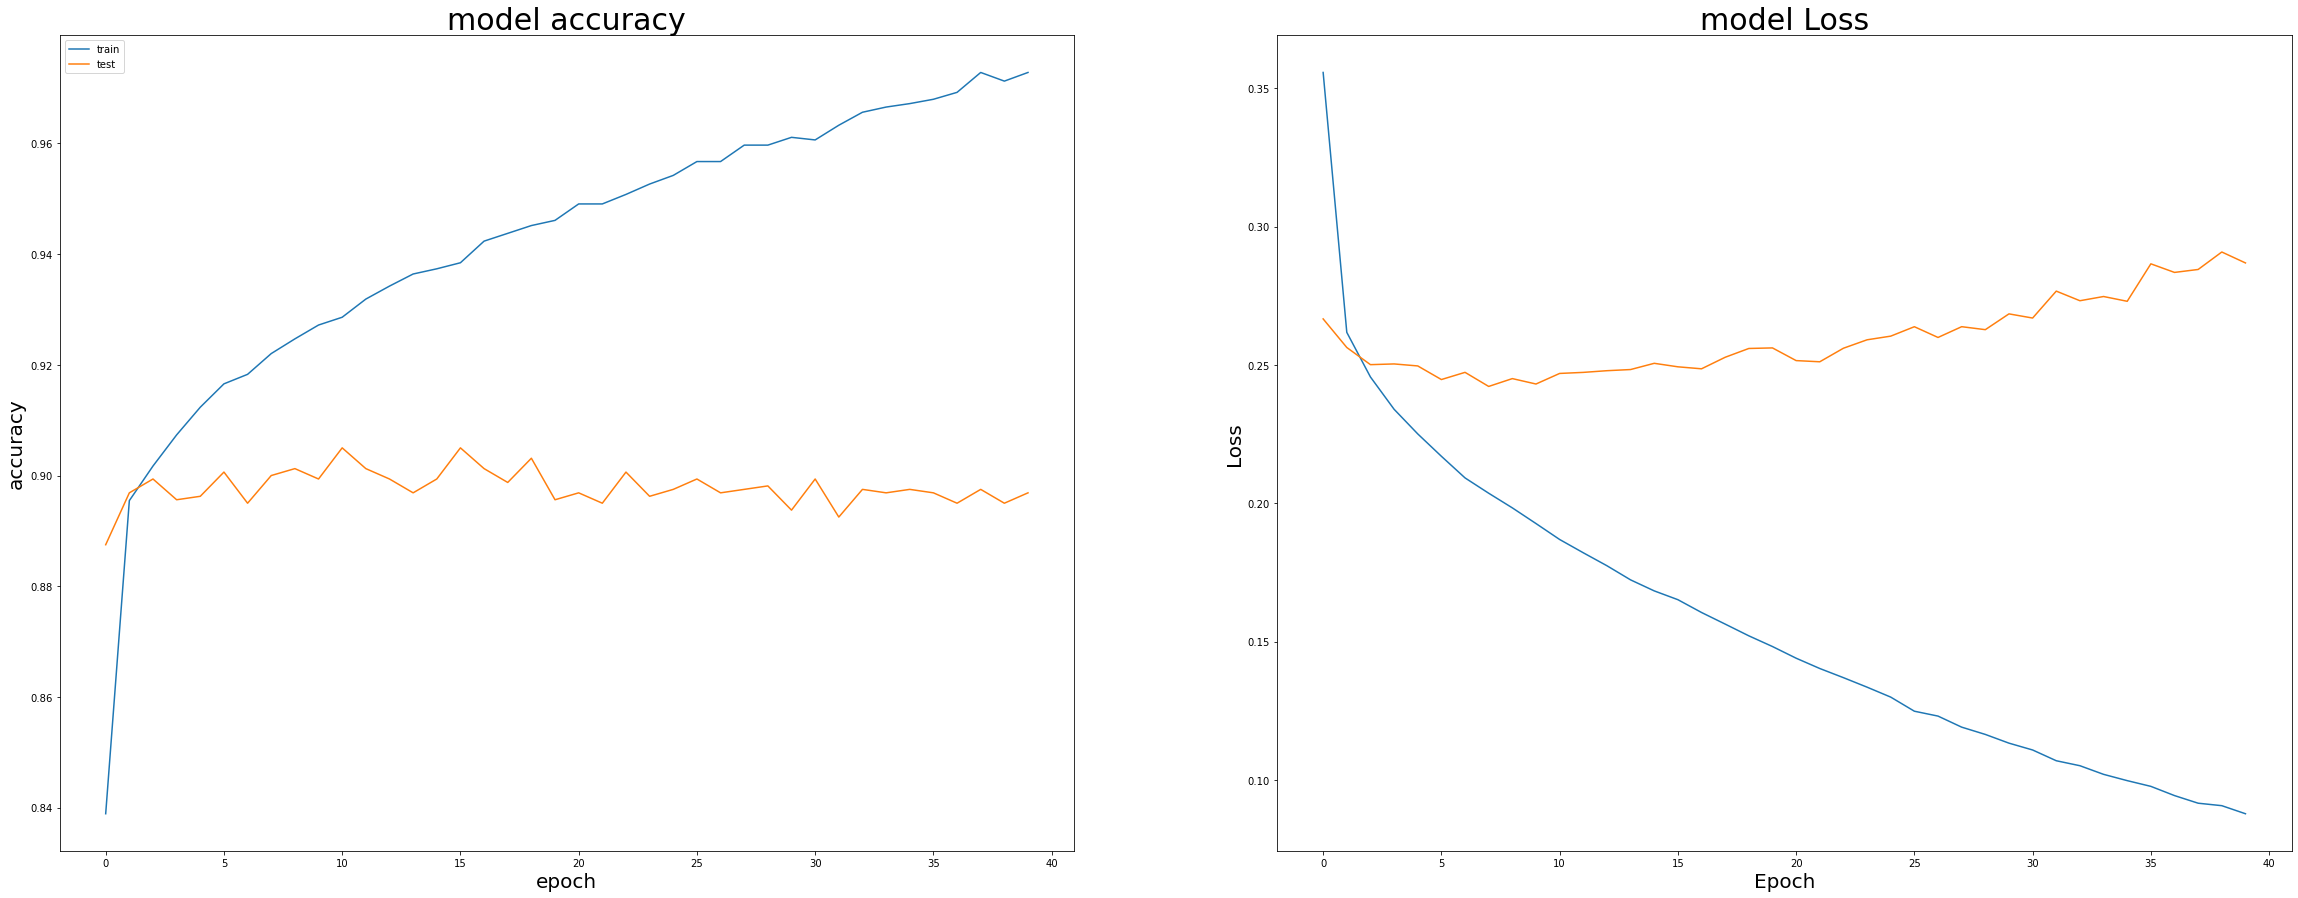

In [60]:
fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(model_w2v_simpler_history.history['accuracy'])
axs[0].plot(model_w2v_simpler_history.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(model_w2v_simpler_history.history['loss'])
axs[1].plot(model_w2v_simpler_history.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)

### Modeling for Text

#### With padding + onehot enconding

### The sofisticated model

In [61]:
VO_SIZE=1000
EMBEDDING_VECTOR_FEATURE_TEXT=100
model_text = Sequential()
model_text.add(Embedding(VO_SIZE, EMBEDDING_VECTOR_FEATURE_TEXT, name='text_embedding'))
model_text.add(LSTM(100))
model_text.add( Dense(1, activation='sigmoid'))
model_text.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_text.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_embedding (Embedding)  (None, None, 100)         100000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 180,501
Trainable params: 180,501
Non-trainable params: 0
_________________________________________________________________
None


In [62]:
text_sent_length = 30
text_sentences = [' '.join(words) for words in news_df_preprocessed['text_tokens']]
onehot_rep = [one_hot(words, VO_SIZE) for words in title_sentences]
embedded_doc = pad_sequences(onehot_rep, padding='pre', maxlen=text_sent_length)

In [63]:
SEED=101
X_text = np.array(embedded_doc)
y = np.array(news_df_preprocessed['label'])

X_text_train, X_text_test, y_text_train , y_text_test = train_test_split(X_text, y, train_size=0.8, random_state=SEED)

In [64]:
history_text = model_text.fit(X_text_train, y_text_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)


Epoch 1/40


200/200 [==============================] - 9s 33ms/step - loss: 0.3884 - accuracy: 0.8306 - val_loss: 0.2686 - val_accuracy: 0.8819
Epoch 2/40
200/200 [==============================] - 6s 28ms/step - loss: 0.2174 - accuracy: 0.9141 - val_loss: 0.2485 - val_accuracy: 0.8994
Epoch 3/40
200/200 [==============================] - 6s 30ms/step - loss: 0.1635 - accuracy: 0.9359 - val_loss: 0.2735 - val_accuracy: 0.8925
Epoch 4/40
200/200 [==============================] - 6s 28ms/step - loss: 0.1321 - accuracy: 0.9508 - val_loss: 0.3079 - val_accuracy: 0.8869
Epoch 5/40
200/200 [==============================] - 6s 29ms/step - loss: 0.1024 - accuracy: 0.9622 - val_loss: 0.3847 - val_accuracy: 0.8794
Epoch 6/40
200/200 [==============================] - 6s 28ms/step - loss: 0.0801 - accuracy: 0.9698 - val_loss: 0.4446 - val_accuracy: 0.8800
Epoch 7/40
200/200 [==============================] - 6s 30ms/step - loss: 0.0666 - accuracy: 0.9769 - val_loss: 0.4068 - val_accuracy: 0.8750
Epoch 8/40

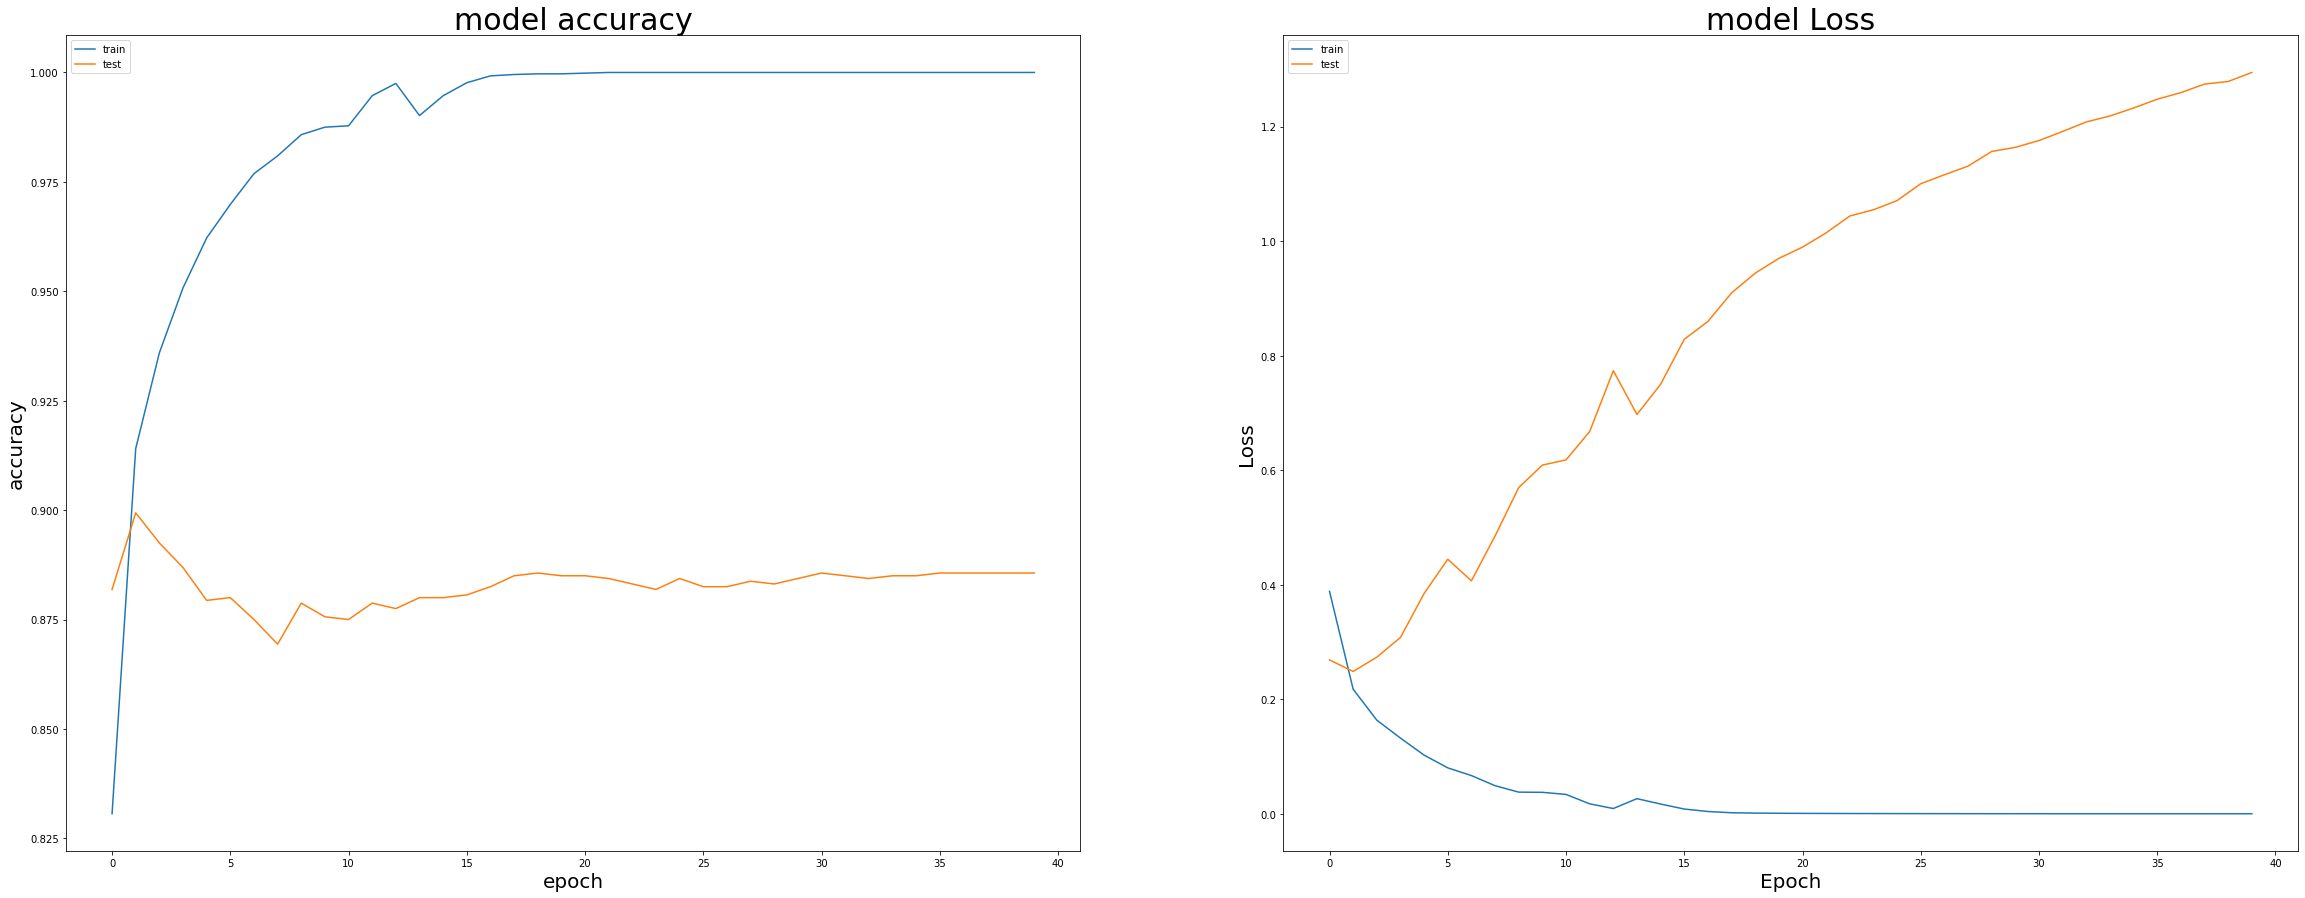

In [65]:
fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(history_text.history['accuracy'])
axs[0].plot(history_text.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(history_text.history['loss'])
axs[1].plot(history_text.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)
axs[1].legend(['train', 'test'], loc='upper left')

#### The Simpler model

In [66]:
len(X_text_train[0])

30

In [67]:
model_ohp_simpler = Sequential()
model_ohp_simpler.add(Dense(32, activation='relu', input_dim=text_sent_length))
model_ohp_simpler.add(Dense(1, activation='sigmoid'))
model_ohp_simpler.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_ohp_simpler_history = model_ohp_simpler.fit(X_text_train, y_text_train, validation_split=0.2,  epochs=40, batch_size=32, verbose=1)

Epoch 1/40


200/200 [==============================] - 3s 6ms/step - loss: 22.6964 - accuracy: 0.5984 - val_loss: 8.0858 - val_accuracy: 0.6331
Epoch 2/40
200/200 [==============================] - 1s 4ms/step - loss: 5.7703 - accuracy: 0.6206 - val_loss: 4.4399 - val_accuracy: 0.6350
Epoch 3/40
200/200 [==============================] - 1s 4ms/step - loss: 3.5412 - accuracy: 0.6373 - val_loss: 2.4882 - val_accuracy: 0.6481
Epoch 4/40
200/200 [==============================] - 2s 8ms/step - loss: 2.5181 - accuracy: 0.6339 - val_loss: 3.5915 - val_accuracy: 0.6350
Epoch 5/40
200/200 [==============================] - 1s 3ms/step - loss: 2.0586 - accuracy: 0.6458 - val_loss: 3.8922 - val_accuracy: 0.6087
Epoch 6/40
200/200 [==============================] - 1s 3ms/step - loss: 1.9323 - accuracy: 0.6375 - val_loss: 3.8930 - val_accuracy: 0.5256
Epoch 7/40
200/200 [==============================] - 1s 7ms/step - loss: 1.7688 - accuracy: 0.6439 - val_loss: 1.2431 - val_accuracy: 0.6175
Epoch 8/40
200/2

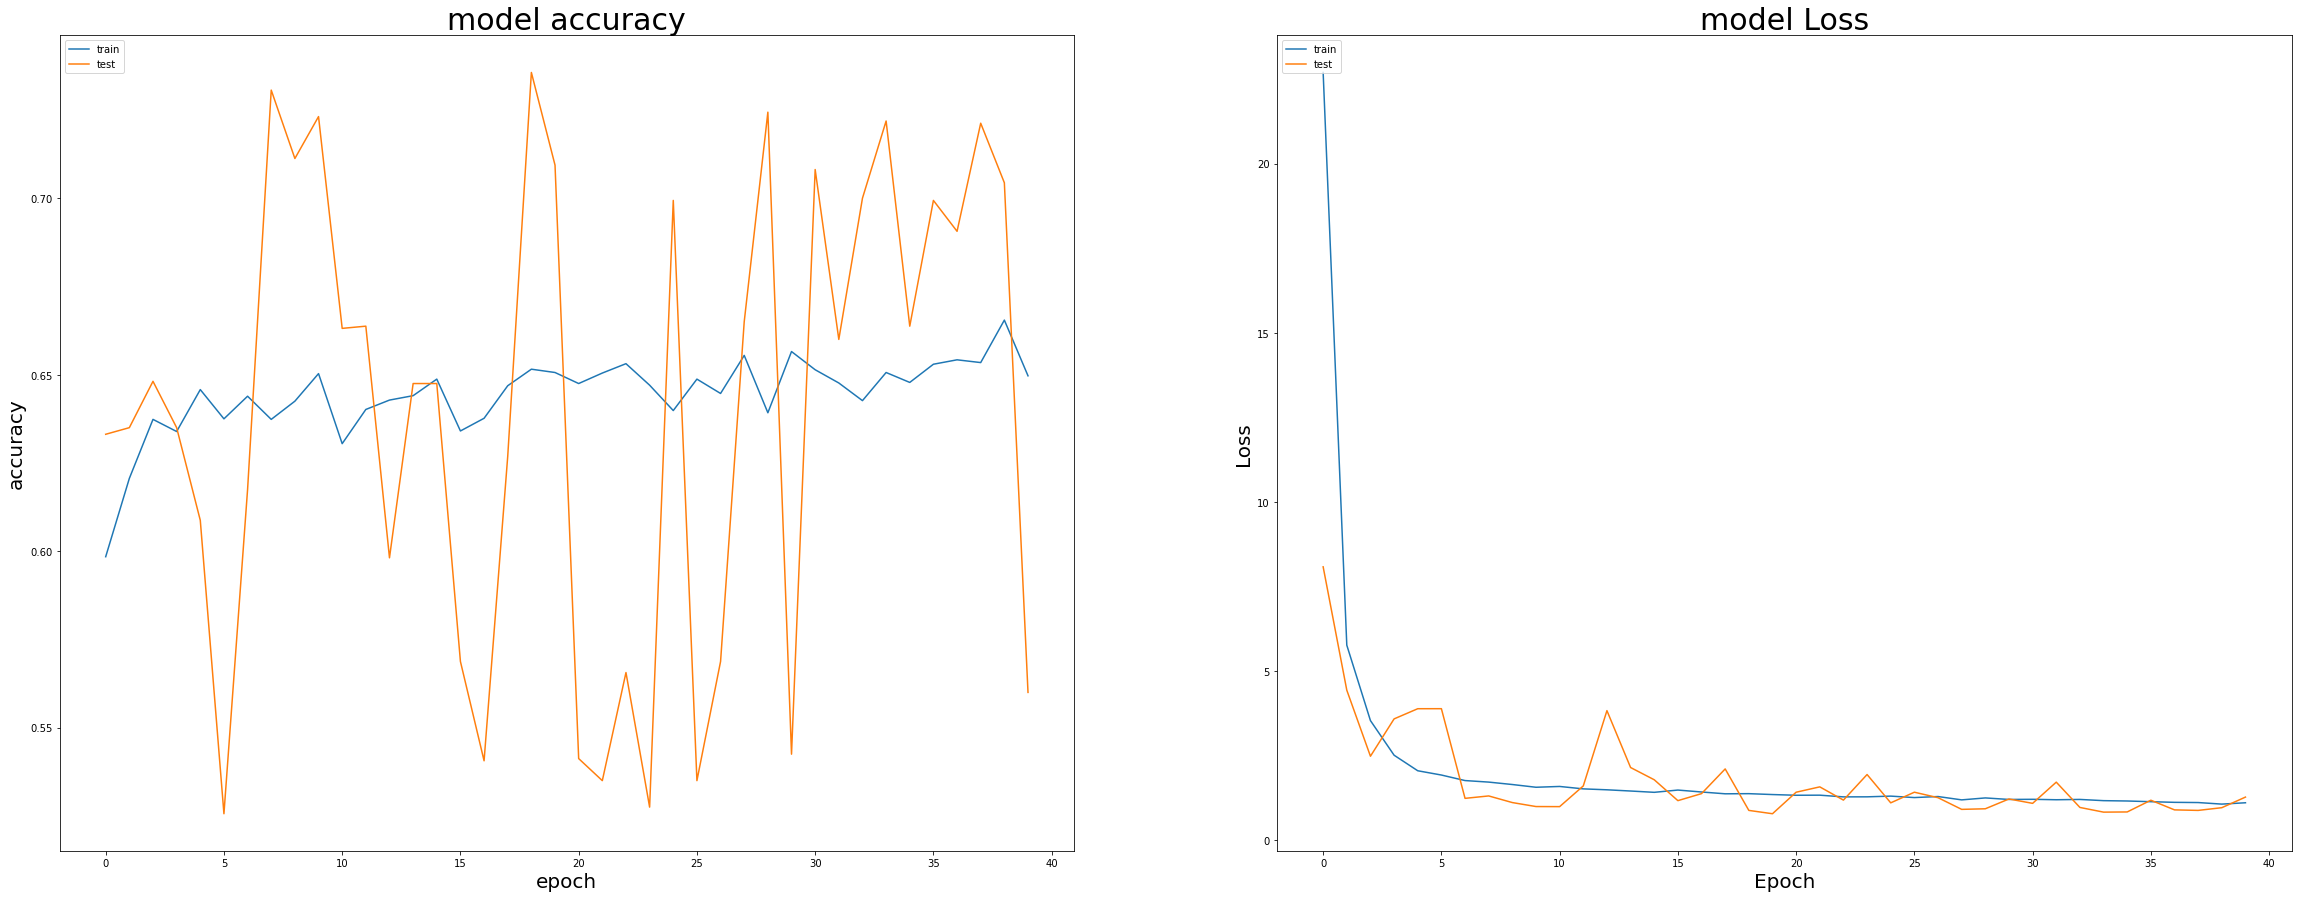

In [68]:
fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(model_ohp_simpler_history.history['accuracy'])
axs[0].plot(model_ohp_simpler_history.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(model_ohp_simpler_history.history['loss'])
axs[1].plot(model_ohp_simpler_history.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)
axs[1].legend(['train', 'test'], loc='upper left')

### Vectorização de palavras

X_title_tokens = np.array(news_df_preprocessed['title_tokens'].values)
y = np.array(news_df_preprocessed['label'].values)


X_title_train, X_title_test, y_title_train , y_title_test = train_test_split(X_title_tokens, y, train_size=0.8, random_state=SEED)

In [69]:
X_text_tokens = np.array(news_df_preprocessed['text_tokens'].values)
y = np.array(news_df_preprocessed['label'].values)


X_text_train, X_text_test, y_text_train , y_text_test = train_test_split(X_text_tokens, y, train_size=0.8, random_state=SEED)

In [70]:
X_text_train = labelizeTweets(X_text_train, 'TRAIN')
X_text_test = labelizeTweets(X_text_test, 'TEST')
train_words = [x.words for x in tqdm(X_train)]

8000it [00:00, 205481.01it/s]
2001it [00:00, 124188.79it/s]
100%|██████████| 8000/8000 [00:00<00:00, 708916.42it/s]


In [71]:
X_train = labelizeTweets(X_text_train, 'TRAIN')
X_test = labelizeTweets(X_text_test, 'TEST')
train_words = [x.words for x in tqdm(X_text_train)]

8000it [00:00, 186387.62it/s]
2001it [00:00, 206338.10it/s]
100%|██████████| 8000/8000 [00:00<00:00, 548508.06it/s]


In [72]:
#build word vocab and vectorization
N_DIM = 100
train_words = [x.words for x in tqdm(X_text_train)]
news_w2v = Word2Vec(vector_size=N_DIM, min_count=10,window=5, workers=4)
news_w2v.build_vocab(train_words)
news_w2v.train(train_words, total_words=news_w2v.corpus_total_words, epochs=50)

100%|██████████| 8000/8000 [00:00<00:00, 777226.72it/s]


(2535720, 3811000)

## Sofisticated Model

In [73]:
VO_SIZE= len(list(vocab.keys()))
EMBEDDING_VECTOR_FEATURE_TEXT=100
model_text_sofisticated = Sequential()
model_text_sofisticated.add(Embedding(VO_SIZE, EMBEDDING_VECTOR_FEATURE_TEXT, name='text_embedding'))
model_text_sofisticated.add(LSTM(100))
model_text_sofisticated.add( Dense(1, activation='sigmoid'))
model_text_sofisticated.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_text_sofisticated.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_embedding (Embedding)  (None, None, 100)         153100    
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 233,601
Trainable params: 233,601
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
X_text_train = labelizeTweets(X_text_train, 'TRAIN')
X_text_test = labelizeTweets(X_text_test, 'TEST')
train_words = [x.words for x in tqdm(X_train)]

8000it [00:00, 512829.47it/s]
2001it [00:00, 356821.66it/s]
100%|██████████| 8000/8000 [00:00<00:00, 1972745.72it/s]


In [77]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x.words for x in train_words])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

In [78]:
train_vecs_w2v = np.concatenate([buildWordVector(z, N_DIM,news_w2v) for z in tqdm(map(lambda x: x.words, X_text_train))])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, N_DIM,news_w2v) for z in tqdm(map(lambda x: x.words, X_text_test))])
test_vecs_w2v = scale(test_vecs_w2v)



vocab = news_w2v.wv.key_to_index

train_vecs_w2v2 = np.array([ np.int64(v + VO_SIZE - VO_GAP) for v in train_vecs_w2v])

0it [00:00, ?it/s]

8000it [00:00, 19096.48it/s]
2001it [00:00, 22762.18it/s]


In [79]:
model_text_sofisticated_history = model_text_sofisticated.fit(train_vecs_w2v2, y_text_train, validation_split=0.2,  epochs=40, batch_size=32, verbose=1)

Epoch 1/40


200/200 [==============================] - 24s 105ms/step - loss: 0.5959 - accuracy: 0.6627 - val_loss: 0.5738 - val_accuracy: 0.6837
Epoch 2/40
200/200 [==============================] - 20s 98ms/step - loss: 0.5540 - accuracy: 0.7036 - val_loss: 0.5598 - val_accuracy: 0.6919
Epoch 3/40
200/200 [==============================] - 26s 132ms/step - loss: 0.5370 - accuracy: 0.7198 - val_loss: 0.5804 - val_accuracy: 0.6938
Epoch 4/40
200/200 [==============================] - 24s 119ms/step - loss: 0.5320 - accuracy: 0.7202 - val_loss: 0.5321 - val_accuracy: 0.7019
Epoch 5/40
200/200 [==============================] - 19s 95ms/step - loss: 0.5155 - accuracy: 0.7303 - val_loss: 0.5395 - val_accuracy: 0.7038
Epoch 6/40
200/200 [==============================] - 18s 92ms/step - loss: 0.5139 - accuracy: 0.7345 - val_loss: 0.5390 - val_accuracy: 0.7019
Epoch 7/40
200/200 [==============================] - 22s 108ms/step - loss: 0.5105 - accuracy: 0.7330 - val_loss: 0.5271 - val_accuracy: 0.7225

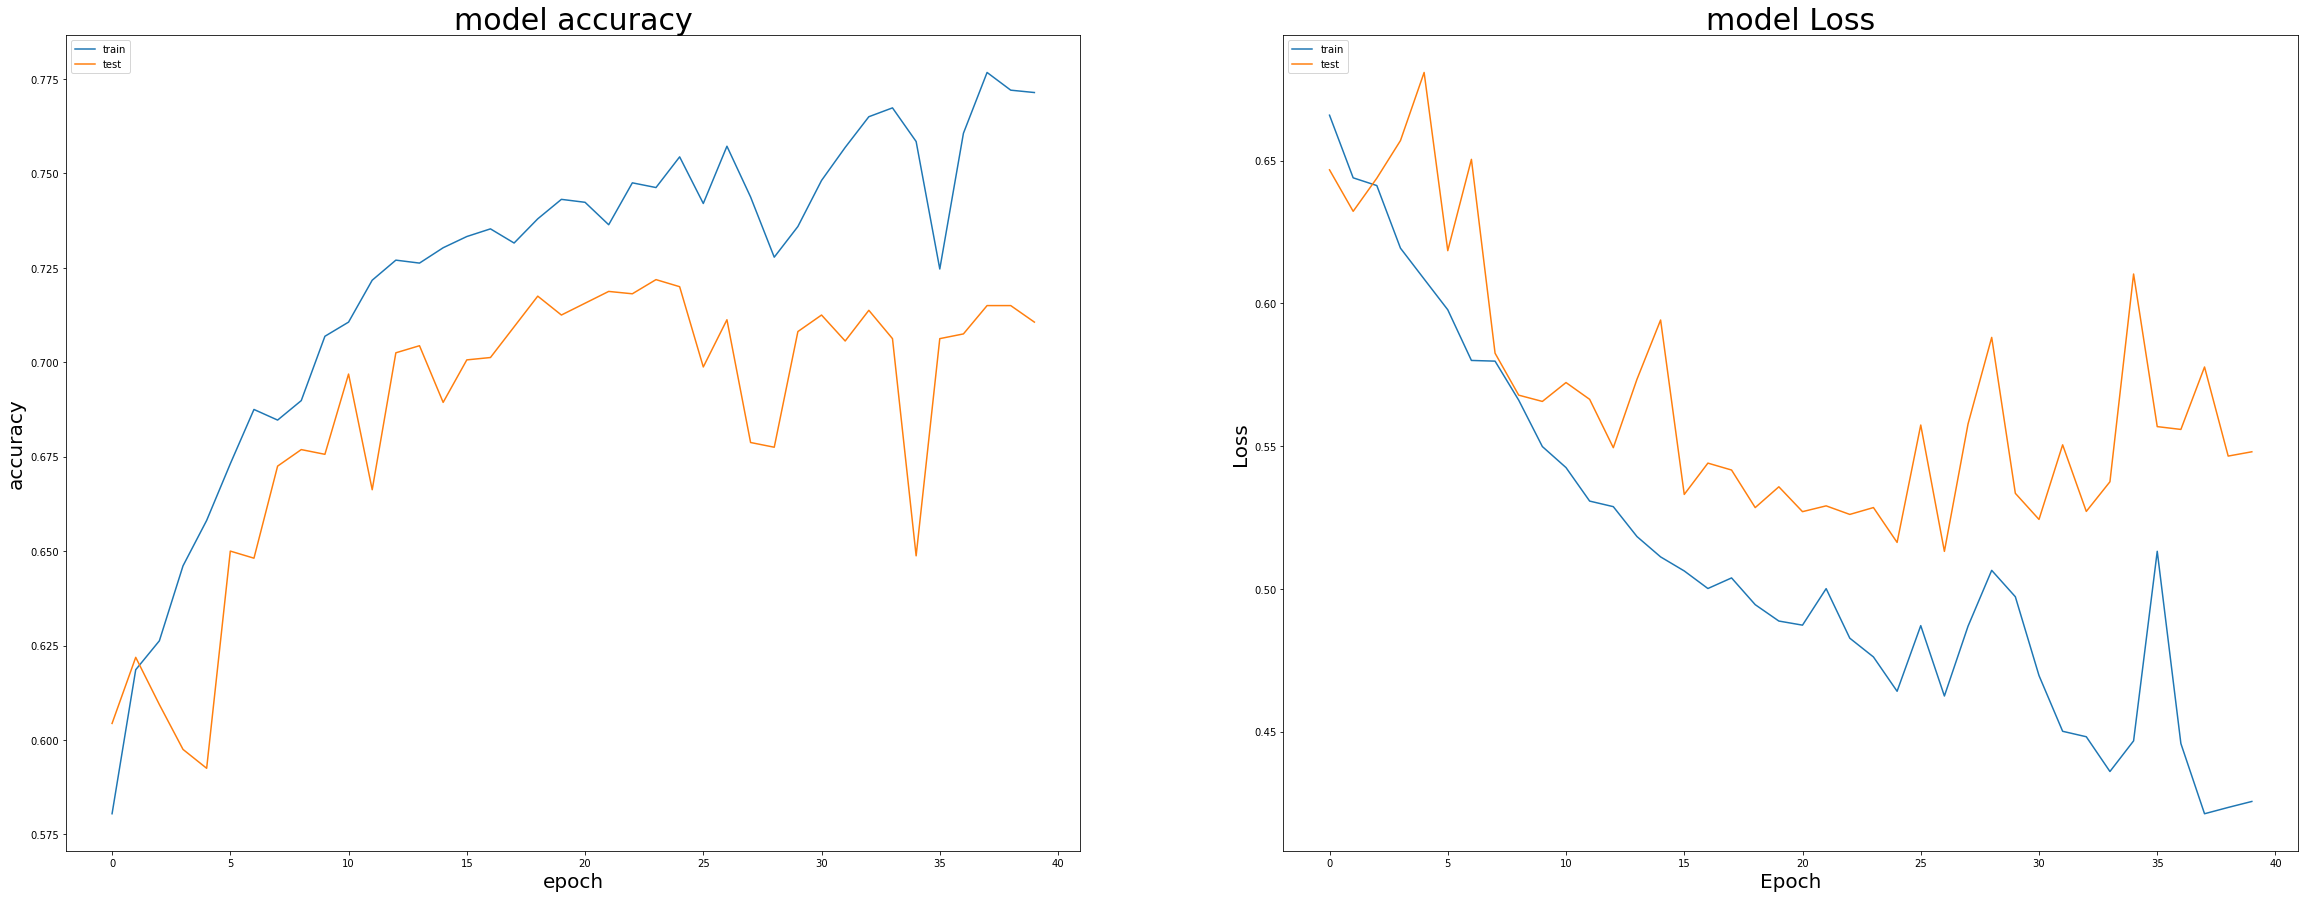

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(model_text_sofisticated_history.history['accuracy'])
axs[0].plot(model_text_sofisticated_history.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(model_text_sofisticated_history.history['loss'])
axs[1].plot(model_text_sofisticated_history.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)
axs[1].legend(['train', 'test'], loc='upper left')

#### Com o modelo mais simples

In [ ]:
model_ohp_simpler = Sequential()
model_ohp_simpler.add(Dense(32, activation='relu', input_dim=N_DIM))
model_ohp_simpler.add(Dense(1, activation='sigmoid'))
model_ohp_simpler.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_ohp_simpler_history = model_ohp_simpler.fit(train_vecs_w2v2, y_text_train, validation_split=0.2,  epochs=40, batch_size=32, verbose=1)

Epoch 1/40
200/200 [==============================] - 2s 4ms/step - loss: 86.1367 - accuracy: 0.4903 - val_loss: 103.4792 - val_accuracy: 0.5063
Epoch 2/40
200/200 [==============================] - 1s 4ms/step - loss: 72.8474 - accuracy: 0.4920 - val_loss: 170.8732 - val_accuracy: 0.5063
Epoch 3/40
200/200 [==============================] - 1s 3ms/step - loss: 67.7398 - accuracy: 0.5039 - val_loss: 44.4401 - val_accuracy: 0.5063
Epoch 4/40
200/200 [==============================] - 1s 4ms/step - loss: 61.4190 - accuracy: 0.5000 - val_loss: 83.2550 - val_accuracy: 0.5063
Epoch 5/40
200/200 [==============================] - 1s 4ms/step - loss: 55.0678 - accuracy: 0.5028 - val_loss: 19.8227 - val_accuracy: 0.4938
Epoch 6/40
200/200 [==============================] - 1s 4ms/step - loss: 44.7987 - accuracy: 0.5038 - val_loss: 98.3822 - val_accuracy: 0.5063
Epoch 7/40
200/200 [==============================] - 1s 4ms/step - loss: 42.2255 - accuracy: 0.4988 - val_loss: 20.2982 - val_accurac

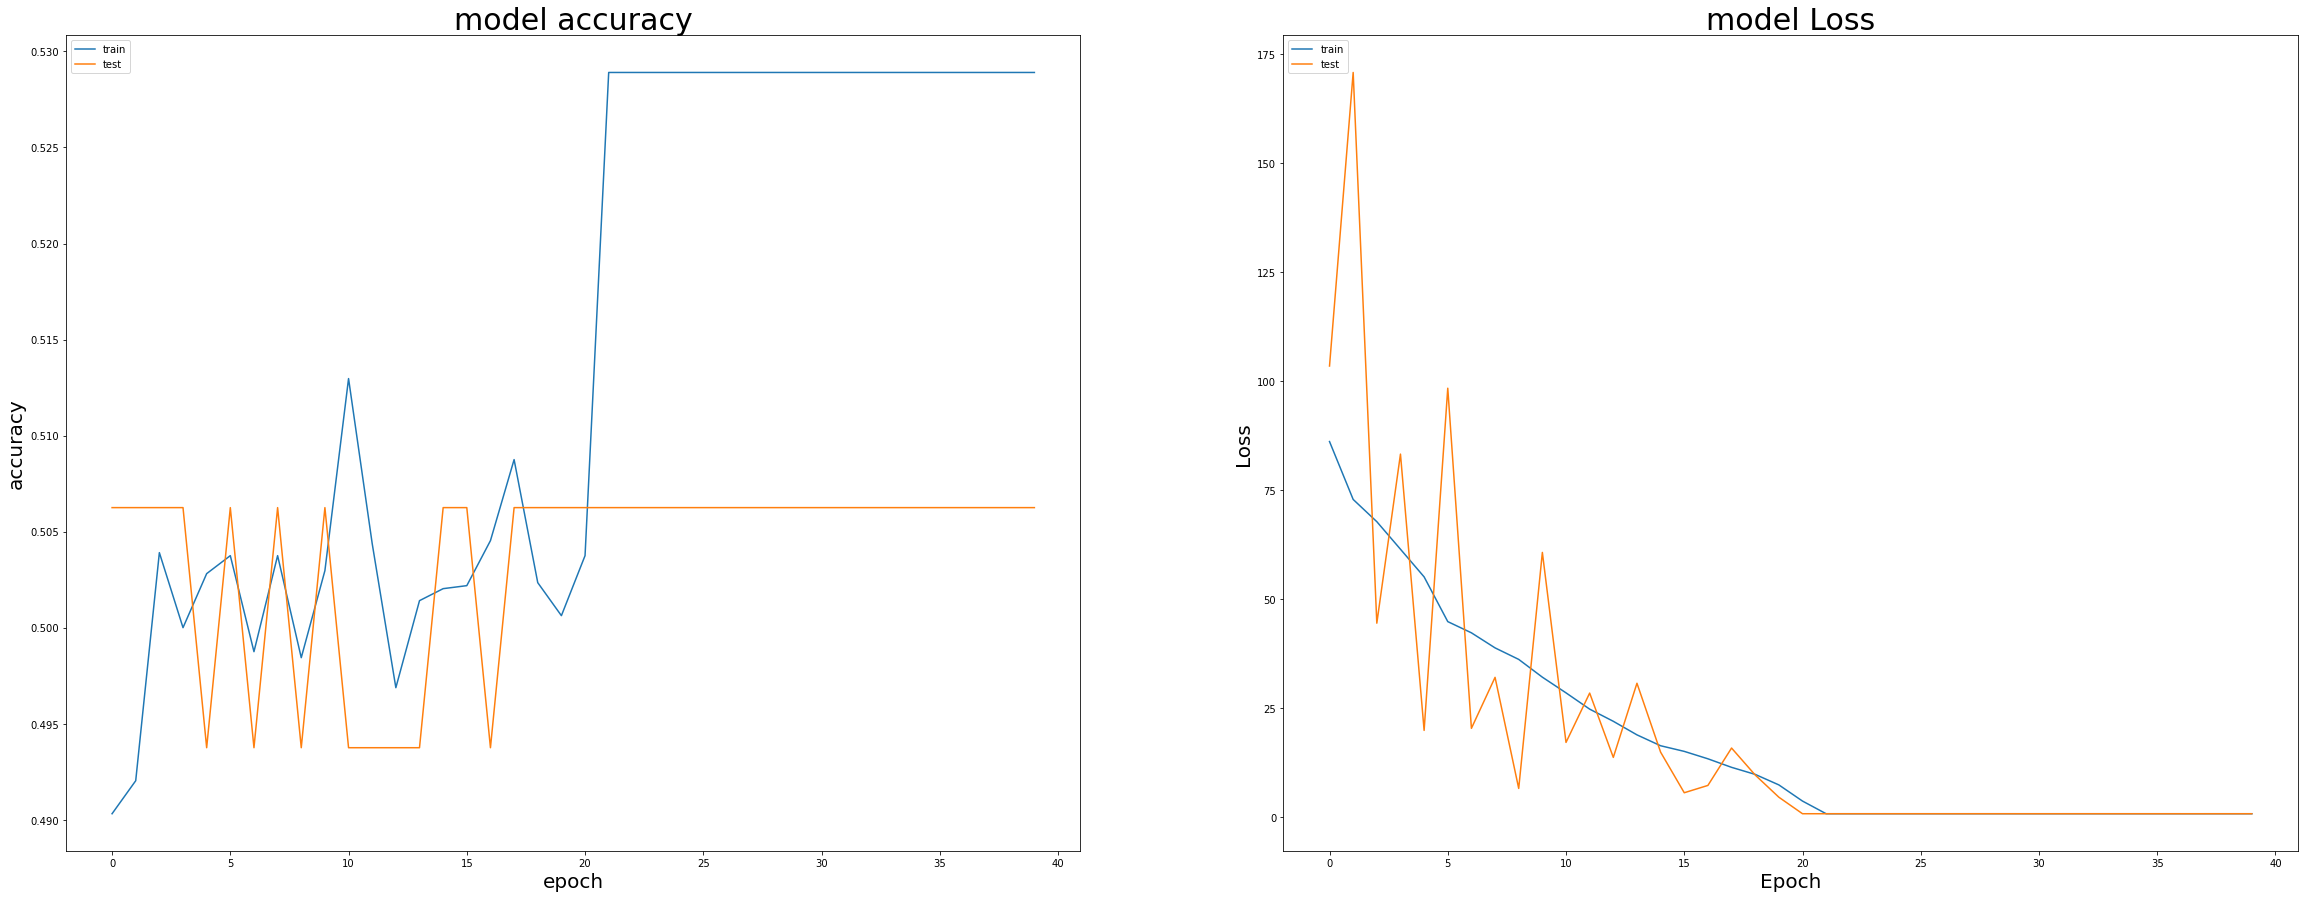

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(40,15))
fig.set_facecolor('white')
axs[0].plot(model_ohp_simpler_history.history['accuracy'])
axs[0].plot(model_ohp_simpler_history.history['val_accuracy'])
axs[0].set_title('model accuracy', fontsize=TITLE_SIZE)
axs[0].set_ylabel('accuracy',fontsize=FONT_SIZE)
axs[0].set_xlabel('epoch', fontsize=FONT_SIZE)
axs[0].legend(['train', 'test'], loc='upper left')



axs[1].plot(model_ohp_simpler_history.history['loss'])
axs[1].plot(model_ohp_simpler_history.history['val_loss'])
axs[1].set_title('model Loss', fontsize=TITLE_SIZE)
axs[1].set_ylabel('Loss',fontsize=FONT_SIZE)
axs[1].set_xlabel('Epoch', fontsize=FONT_SIZE)
axs[1].legend(['train', 'test'], loc='upper left')

o modelo mais simple é simples demais e está apresentando um comportamento de um modelo underfitting, alta variância. Já o modelo mais complexo fica overfitting depois de algumas poucas épocas. Porém ele performa melhor

In [ ]:
import os



['./',
 './.git',
 './.git\\hooks',
 './.git\\info',
 './.git\\logs',
 './.git\\logs\\refs',
 './.git\\logs\\refs\\heads',
 './.git\\logs\\refs\\remotes',
 './.git\\logs\\refs\\remotes\\fake_news-detector',
 './.git\\objects',
 './.git\\objects\\24',
 './.git\\objects\\3f',
 './.git\\objects\\b7',
 './.git\\objects\\c6',
 './.git\\objects\\d5',
 './.git\\objects\\e5',
 './.git\\objects\\info',
 './.git\\objects\\pack',
 './.git\\refs',
 './.git\\refs\\heads',
 './.git\\refs\\remotes',
 './.git\\refs\\remotes\\fake_news-detector',
 './.git\\refs\\tags',
 './DeepLearningAlgorithmsAchitectures',
 './Environment',
 './PreProcessing',
 './PreProcessing\\Abstractions',
 './PreProcessing\\Abstractions\\__pycache__',
 './PreProcessing\\Encoders',
 './PreProcessing\\__pycache__',
 './Utils',
 './Utils\\__pycache__']

In [ ]:
from PreProcessing.EspecialCharRemover import EspecialCharRemover

test = EspecialCharRemover()
test.fit()



EspcialCharRemover started preprocessing...


EspecialCharRemover()